In [3]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

#리턴 : 올라가는 혈당 수치
def A1cConvert(a1c):
    if a1c > 9.0:
        return 250
    elif a1c <= 9.0 and a1c > 8.0:
        return 200
    elif a1c <= 8.0 and a1c > 7.0:
        return 150
    elif a1c <= 7.0 and a1c > 6.0:
        return 100
    elif a1c <= 6.0:
        return 50

#환자 데이터 읽기
df = pd.read_csv('sch/1185429_train.csv')

#dm, a1c 변수 저장 후 열의 이름을 설정해준다.
dm = float(df.columns[0])
a1c = float(df.columns[1])
col = ['glucose', 'meal']
df.columns = col

#예측 식사 값 적용할 열 생성 이 때 값은 0으로 초기화
df['meal_predict'] = 0
premeal_index = []
#한시간 단위로 끊어서 레이블 개수만큼 반복
for i in range(12,len(df.index)):
    #임시 리스트를 만들어
    temp = []
    #한시간 단위로 12개 인덱스를 가지는 데이터 프레임을 추출 후 리스트화시켜 앞서 만든 리스트에 덮어쓴다.
    temp = df[i-12:i].glucose.tolist()
    print(temp[11]-temp[0])
    #만약 임시 리스트의 마지막 인덱스와 첫 인덱스의 차가 앞서 만든 a1c 컨버터 반환 값보다 크거나 같다면
    if temp[11]-temp[0] >= A1cConvert(a1c):
        # 해당 인덱스 i 의 예측된 식사값을 1로 변경한다.
        df.xs(i)['meal_predict'] = 1
        
    if temp[11]-temp[0] >=100:
        premeal_index.append(i)

        
        

        
    

13
15
8
8
8
10
14
15
21
23
29
20
23
31
37
42
48
50
56
57
53
27
15
3
-22
-14
-11
-13
-20
-25
-23
-24
-9
3
8
26
12
5
-6
-7
-23
-35
-29
-25
-34
-27
-25
-20
-20
-10
-7
10
13
6
-1
1
-6
-7
-8
-7
-7
-4
-1
4
4
4
5
7
6
5
2
-3
-8
-12
-15
-15
-15
-15
-13
-9
-11
-12
-12
-12
-13
-14
-16
-17
-18
-19
-22
-19
-15
-13
-10
-8
-6
-4
-1
-3
-11
-19
-36
-56
-73
-80
-69
-53
-34
-32
-28
-20
-11
6
29
45
49
38
20
-1
-3
-4
-4
-6
-8
-14
-13
-9
-7
-5
2
1
-4
-7
-7
-7
-7
-8
-12
-15
-14
-20
-10
5
8
8
12
16
21
29
36
38
40
32
21
19
22
25
27
25
20
23
24
26
23
37
43
46
42
41
41
57
58
57
61
60
48
41
51
52
55
59
45
38
35
30
32
33
36
21
16
4
-4
-11
-15
-22
-29
-34
-39
-46
-47
-44
-40
-40
-38
-38
-32
-28
-26
-22
-17
-16
-21
-15
-16
-15
-6
2
2
6
8
21
34
45
63
83
89
92
99
105
118
115
105
110
122
119
107
107
98
88
82
72
71
66
44
27
8
3
6
-4
-17
-17
-30
-33
-22
-16
-12
-28
-20
-30
-15
-3
-6
-2
-11
-18
-33
-37
-34
-47
-35
-38
-37
-48
-40
-22
-21
-19
-36
-26
-7
-17
-22
-33
-23
-32
-47
-52
-45
-34
-39
-51
-49
-54
-43
-36
-33
-16
-1

In [6]:
df2= pd.read_csv('sch/1185429_test.csv')
dm = float(df2.columns[0])
a1c = float(df2.columns[1])
df2.columns = col
df2['meal'].value_counts()

0    553
1      5
Name: meal, dtype: int64

In [7]:
df['meal_predict'].value_counts()


0    558
Name: meal_predict, dtype: int64

In [8]:
df

,glucose,meal,meal_predict
0,147,0,0
1,146,0,0
2,150,0,0
3,146,0,0
4,145,0,0
5,143,0,0
6,142,0,0
7,139,0,0
8,136,0,0
9,140,0,0


In [9]:
df2= pd.read_csv('sch/1185429_test.csv')
dm = float(df2.columns[0])
a1c = float(df2.columns[1])
df2.columns = col
df2['meal'].value_counts()

0    553
1      5
Name: meal, dtype: int64

In [10]:
df3= pd.read_csv('sch/1185429_test.csv')

In [11]:
df3

,15,10.2
0,147,0
1,146,0
2,150,0
3,146,0
4,145,0
5,143,0
6,142,0
7,139,0
8,136,0
9,140,0


In [12]:
a1c

10.2

In [13]:
dm

15.0

In [14]:
plt.show()

In [15]:
df.meal.tolist().index(1)

169

In [18]:
tmp = []
for i in range(0,len(df.index)):
    if df.meal[i] == 1:
        tmp.append(i)

In [19]:
tmp

[169, 230, 299, 460, 519]

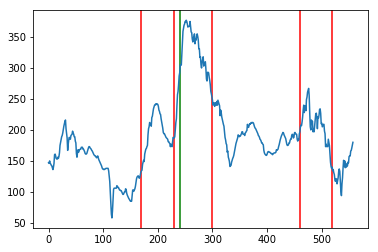

In [20]:
xcoords = tmp
for xc in xcoords:
    plt.axvline(x=xc, color = 'r')
    

plt.axvline(x=241, color = 'g')
plt.plot(df.glucose.tolist())
plt.show()

In [49]:
premeal_index

[241, 242, 243, 244, 245, 246, 247, 248, 249]

In [67]:
df[165:182]

,glucose,meal,meal_predict
165,124,0,0
166,122,0,0
167,123,0,0
168,128,0,0
169,132,1,0
170,134,0,0
171,135,0,0
172,144,0,0
173,148,0,0
174,151,0,0
